In [1]:
import os

import matplotlib.pyplot as plt
import mlflow
import numpy as np

from nowcasting.unet import res2
from nowcasting.utils import CustomGenerator

2022-12-01 00:31:41.653446: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 00:31:41.858444: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-01 00:31:42.627995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-01 00:31:42.628082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or direc

In [2]:
mlflow.set_tracking_uri("../mlruns")

In [3]:
dataset = "12_8_0_20_1.0"
train_directory = f"../data/datasets/{dataset}/train/"
val_directory = f"../data/datasets/{dataset}/val/"

In [4]:
train_paths = [f"{train_directory}/{x}" for x in os.listdir(train_directory)]
train_dataset = CustomGenerator(train_paths, 1, shuffle=False)

val_paths = [f"{val_directory}/{x}" for x in os.listdir(val_directory)]
val_dataset = CustomGenerator(val_paths, 1, shuffle=False)

In [5]:
experiment_id = mlflow.get_experiment_by_name(
    f"hpo_res_mse_12_8_0_20_1.0").experiment_id
print(experiment_id)
df = mlflow.search_runs(experiment_id)

498167589692783847


In [6]:
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse,metrics.val_loss,metrics.lr,metrics.val_mse,...,params.hpo_num_filters_base,params.opt_inner_optimizer,params.monitor,params.baseline,params.initial_epoch,tags.mlflow.source.type,tags.mlflow.source.git.commit,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,f5114659d66d4770bc3c61e87521bfb6,498167589692783847,RUNNING,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 09:37:11.615000+00:00,NaT,0.998700,0.979359,1.000000e-04,0.979335,...,4,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,amazing-goose-541,joren015
1,d8e6e4acc82d45d6aca4cba551fa3cb1,498167589692783847,RUNNING,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 09:26:46.021000+00:00,NaT,1.048079,1.020108,1.000000e-08,1.020352,...,8,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,orderly-cow-813,joren015
2,461987878bee45e2b04b15ad25b38f7c,498167589692783847,RUNNING,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 08:54:09.810000+00:00,NaT,0.997242,0.974254,1.000000e-04,0.974397,...,4,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,overjoyed-ape-25,joren015
3,c1a51c6b0a0c450a8bf1b645e85a74cc,498167589692783847,RUNNING,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 08:40:08.675000+00:00,NaT,1.044766,1.018316,1.000000e-09,1.018192,...,4,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,bald-cod-649,joren015
4,d90de2098127404fa5cc154fe7ca58ed,498167589692783847,FINISHED,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 08:28:07.638000+00:00,2022-11-30 09:37:06.010000+00:00,1.042375,1.020463,9.999999e-11,1.020474,...,8,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,unequaled-sloth-348,joren015
5,5d9bff348907431ab1a95cf76f02d2b5,498167589692783847,FINISHED,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 08:19:34.795000+00:00,2022-11-30 09:26:40.621000+00:00,1.045141,1.020108,1.000000e-14,1.019949,...,4,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,luminous-shoat-343,joren015
6,f02050a078984c11a49c567a8ef02ab2,498167589692783847,FINISHED,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 07:19:33.807000+00:00,2022-11-30 08:40:03.176000+00:00,1.042825,1.020064,9.999999e-11,1.019850,...,4,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,abundant-fowl-471,joren015
7,1cdeaaa788de496dbfc06220db2bbbe4,498167589692783847,FINISHED,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 07:11:11.729000+00:00,2022-11-30 08:54:04.374000+00:00,1.039639,1.017267,1.000000e-06,1.017135,...,8,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,charming-ant-307,joren015
8,5e8a7c33bca945729cde3337652e28be,498167589692783847,FINISHED,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 06:23:23.031000+00:00,2022-11-30 08:19:29.378000+00:00,1.043137,1.020058,1.000000e-14,1.019915,...,4,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,judicious-crab-737,joren015
9,23a6482b19ed453f9b4b05f493672d37,498167589692783847,FINISHED,file:///panfs/jay/groups/6/csci8523/joren015/r...,2022-11-30 05:25:41.460000+00:00,2022-11-30 07:18:25.280000+00:00,1.044528,1.019820,9.999999e-11,1.019688,...,8,"{'class_name': 'Adam', 'config': {'name': 'Ada...",val_loss,None,0,LOCAL,fae7ba7c65ae15d4368c1f3bbe172e1c555ebae6,hpo.py,bold-roo-843,joren015


In [7]:
non_zero_runs = []
for i in range(len(df)):
    row = df.iloc[i]
    run_id = row["run_id"]
    num_filters_base = int(row["params.hpo_num_filters_base"])
    # model = res2((12, 256, 620, 4),
    #              num_filters_base=num_filters_base,
    #              dropout_rate=0)
    # model.load_weights(
    #     f"../mlruns/{experiment_id}/{run_id}/artifacts/script_n1.h5")
    # y_hat = model.predict(val_dataset)
    # non_zero_output = np.count_nonzero(y_hat[y_hat > np.mean(y_hat)])
    # print(non_zero_output)
    # if non_zero_output > 100:
    #     non_zero_runs.append({
    #         "weights":
    #         f"../mlruns/{experiment_id}/{run_id}/artifacts/script_n1.h5",
    #         "num_filters_base": num_filters_base,
    #         "non_zero_output": non_zero_output,
    #         "val_mse": row["metrics.val_mse"],
    #         "run_name": row["tags.mlflow.runName"]
    #     })
    non_zero_runs.append({
        "weights":
        f"../mlruns/{experiment_id}/{run_id}/artifacts/script_n1.h5",
        "num_filters_base": num_filters_base,
        "val_mse": row["metrics.val_mse"],
        "run_name": row["tags.mlflow.runName"]
    })


In [8]:
print(len(non_zero_runs))

37


In [9]:
non_zero_runs

[{'weights': '../mlruns/498167589692783847/f5114659d66d4770bc3c61e87521bfb6/artifacts/script_n1.h5',
  'num_filters_base': 4,
  'val_mse': 0.9793352484703064,
  'run_name': 'amazing-goose-541'},
 {'weights': '../mlruns/498167589692783847/d8e6e4acc82d45d6aca4cba551fa3cb1/artifacts/script_n1.h5',
  'num_filters_base': 8,
  'val_mse': 1.020351767539978,
  'run_name': 'orderly-cow-813'},
 {'weights': '../mlruns/498167589692783847/461987878bee45e2b04b15ad25b38f7c/artifacts/script_n1.h5',
  'num_filters_base': 4,
  'val_mse': 0.9743967652320862,
  'run_name': 'overjoyed-ape-25'},
 {'weights': '../mlruns/498167589692783847/c1a51c6b0a0c450a8bf1b645e85a74cc/artifacts/script_n1.h5',
  'num_filters_base': 4,
  'val_mse': 1.0181920528411865,
  'run_name': 'bald-cod-649'},
 {'weights': '../mlruns/498167589692783847/d90de2098127404fa5cc154fe7ca58ed/artifacts/script_n1.h5',
  'num_filters_base': 8,
  'val_mse': 1.0204740762710571,
  'run_name': 'unequaled-sloth-348'},
 {'weights': '../mlruns/49816758

In [10]:
non_zero_run = [
    x for x in non_zero_runs if x["run_name"] == "receptive-sheep-254"
][0]
print(non_zero_run)
model = res2((12, 256, 620, 4),
             num_filters_base=non_zero_run["num_filters_base"],
             dropout_rate=0)
model.load_weights(non_zero_run["weights"])
model.compile(loss="mean_absolute_error", metrics=["mae", "mse"])


{'weights': '../mlruns/498167589692783847/d029c437ccac43d1b5808f8b922d4bec/artifacts/script_n1.h5', 'num_filters_base': 8, 'val_mse': 0.8587945699691772, 'run_name': 'receptive-sheep-254'}


2022-12-01 00:31:44.638277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 00:31:45.512904: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9621 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:04:00.0, compute capability: 7.5


In [11]:
model.evaluate(train_dataset)

2022-12-01 00:31:58.239098: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2022-12-01 00:31:59.002090: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


10/10 [==============================] - 13s 280ms/step - loss: 0.1146 - mae: 0.1146 - mse: 0.5799


[0.11463828384876251, 0.11463828384876251, 0.5799024105072021]

In [12]:
model.evaluate(val_dataset)

10/10 [==============================] - 3s 283ms/step - loss: 0.1524 - mae: 0.1524 - mse: 0.5988


[0.15243056416511536, 0.15243056416511536, 0.5988401174545288]

In [13]:
used_dataset = val_dataset

In [14]:
y_pred = model.predict(used_dataset)

10/10 [==============================] - 8s 277ms/step


In [15]:
print(np.min(y_pred))

-0.18918404


In [16]:
k = 5
X, y = used_dataset.__getitem__(k)
X = X[0]
y = y[0]
y_hat = y_pred[k]

In [17]:
# y_pred[y_pred < 0.1] = 0

Input


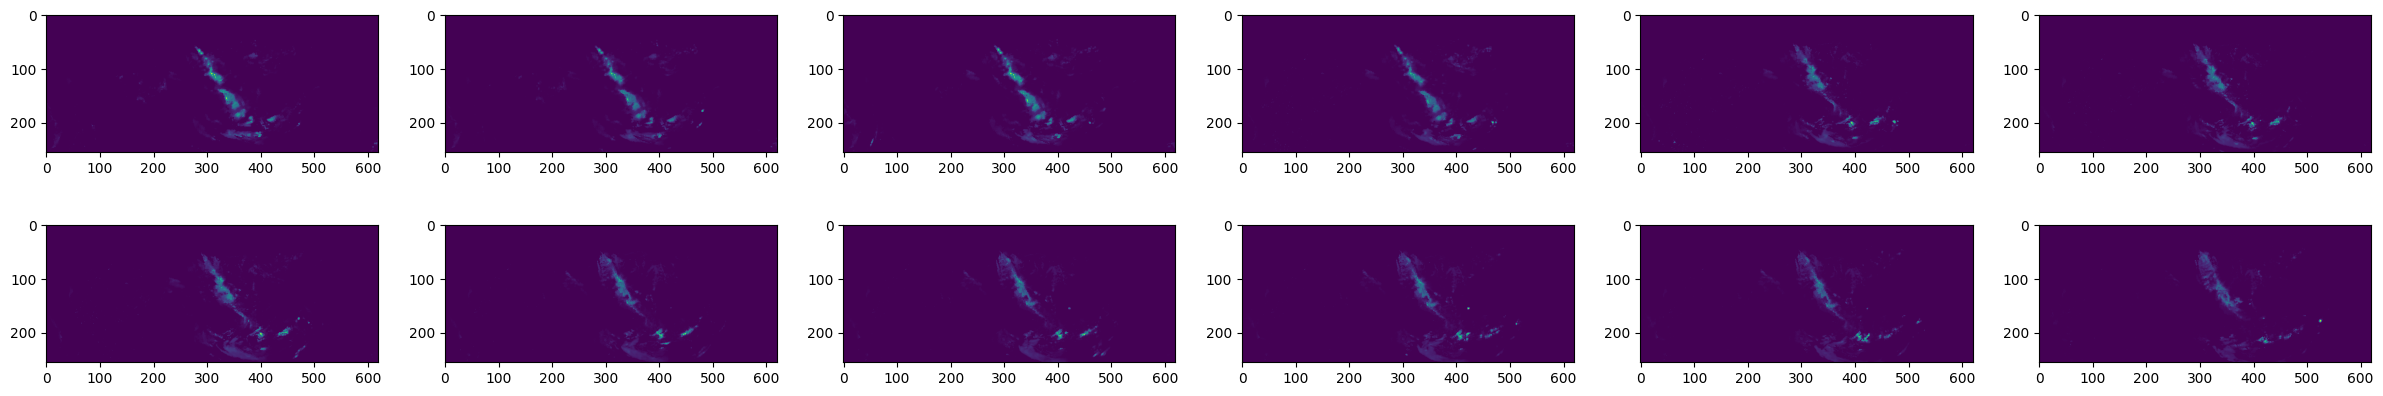

In [18]:
print("Input")
fig, axs = plt.subplots(2, 6, figsize=(30, 5))

for i in range(2):
    for j in range(6):
        axs[i, j].imshow(X[i * 6 + j, :, :, 0])

Target


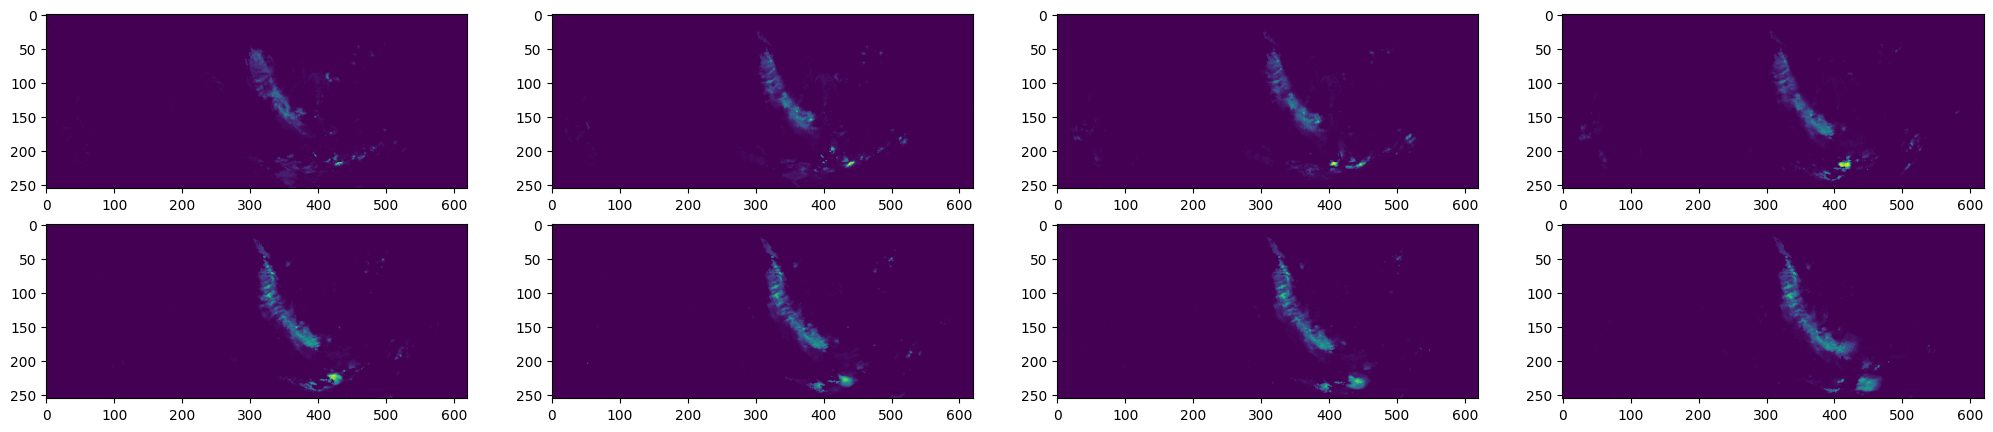

In [19]:
print("Target")
fig, axs = plt.subplots(2, 4, figsize=(25, 5))

for i in range(2):
    for j in range(4):
        axs[i, j].imshow(y[i * 4 + j, :, :, 0])

Prediction


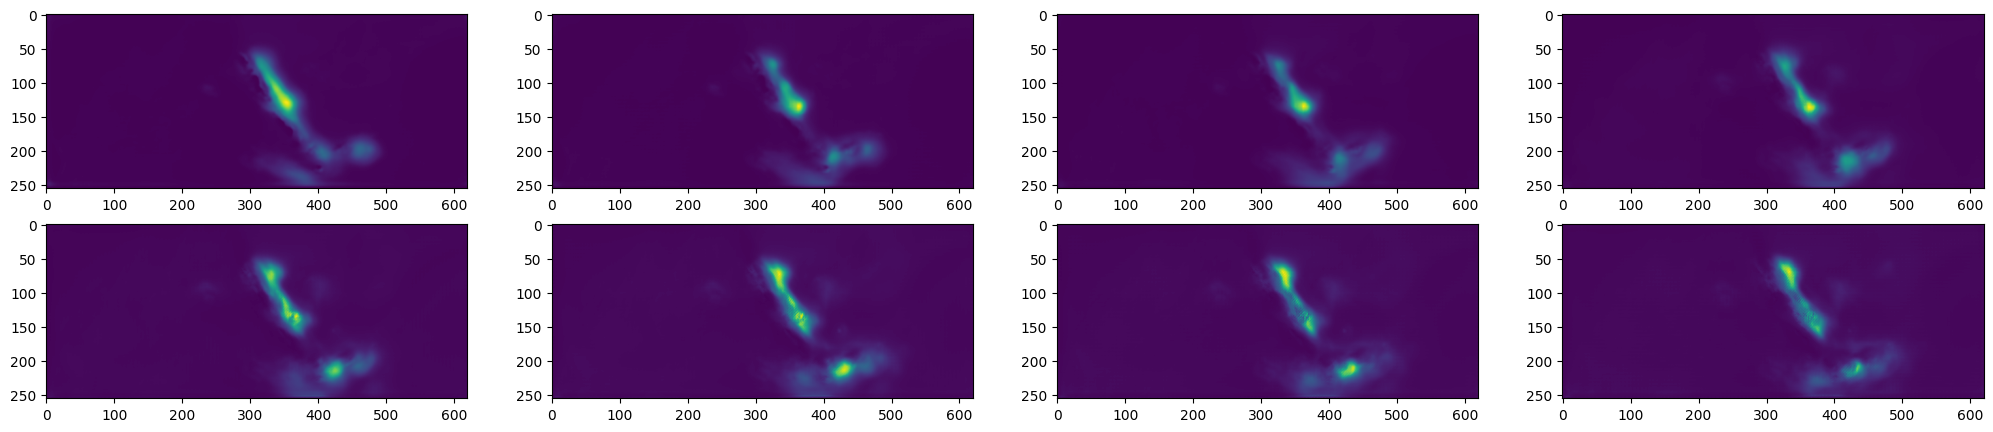

In [20]:
print("Prediction")
fig, axs = plt.subplots(2, 4, figsize=(25, 5))

for i in range(2):
    for j in range(4):
        axs[i, j].imshow(y_hat[i * 4 + j, :, :])

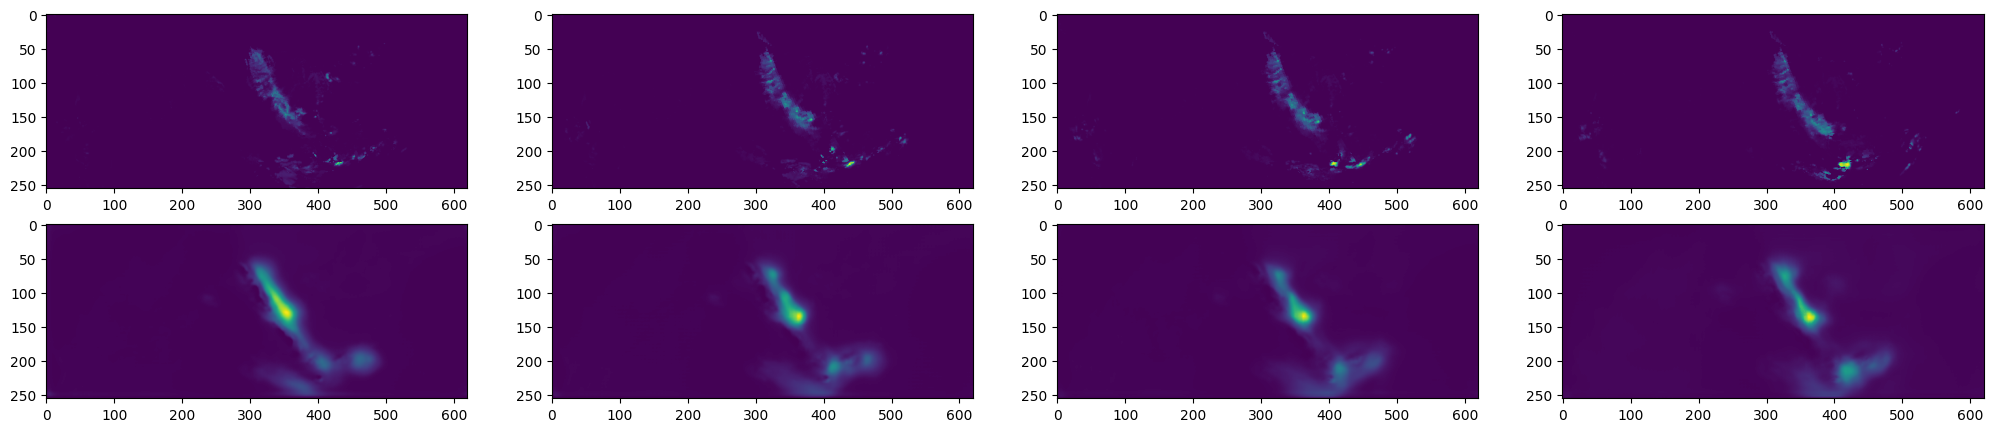

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(25, 5))

for j in range(4):
    axs[0, j].imshow(y[j, :, :, 0])
    axs[1, j].imshow(y_hat[j, :, :])